## Figures Pinsky et al. 2014

Reproduce some of the figures from the paper.


### References
- Pinsky, M., Khain, A., Korolev, A., 2014. Analytical Investigation of Glaciation Time in Mixed-Phase Adiabatic Cloud Volumes. Journal of the Atmospheric Sciences 71, 4143–4157. https://doi.org/10.1175/JAS-D-13-0359.1


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import analytic_formulas as af

In [3]:
%matplotlib inline

In [4]:
    
print('-- -15 -------------------------')
factors = af.get_factors(af.T0-15, 800e2, verbose=True)  

print('-- -35 -------------------------')
factors = af.get_factors(af.T0-35, 800e2, verbose=True)  

print(factors.__dict__.keys())

-- -15 -------------------------
input kwargs:  {}
mv  0.00128997611592904
weigth of adiabatic blob  1.001289976115929
gas constant moist air  287.41253164756046
qv 0.00128997611592904 0.00128997611592904
cpt vs cp 1006.0886255170439 1004.1256460585208
rho_air (with Rt) 1.0782318527571446 
 Ra 1.0790702362336164
-- -35 -------------------------
input kwargs:  {}
mv  0.00017400120494400623
weigth of adiabatic blob  1.000174001204944
gas constant moist air  287.2193811206242
qv 0.00017400120494400623 0.00017400120494400623
cpt vs cp 1005.1470054390542 1003.1518351914463
rho_air (with Rt) 1.1695684896320928 
 Ra 1.1696912932341301
dict_keys(['Lw_param', 'Lw', 'Li_param', 'Li', 'D_param', 'D', 'k_param', 'k', 'Ew_param', 'Ew', 'Ei_param', 'Ei', 'rho_w_param', 'rho_w', 'cp_d_param', 'cp_v_param', 'cp', 'rho_a', 'ksi', 'upsilon_w', 'upsilon_i', 'a0', 'a1', 'a2', 'a3', 'Aw', 'Ai', 'Bi_s', 'Bi', 'Bi_0', 'bi_s', 'bi_0', 'eta', 'Bw', 'bw', 'bi'])


In [5]:
def t_gl(Ni, qw, qi, f, Nw=False,):
    """glaciation time (Pinsky Khain Korolev 2014 Eq. 15a)
    
    """
    
    if Nw:
        T2 = f.ksi*qw**(2/3)/(f.upsilon_w*f.Bw*Nw**(2/3))
    else:
        T2 = 0
    
    T1 = (((qi+f.a1/f.a2*qw)/Ni)**(2/3) - (qi/Ni)**(2/3))/(f.upsilon_i*f.Bi)
    
#     print(3/(2*(f.ksi-1)*f.upsilon_i*f.Bi))
#     print('T1', T1)
#     print('T2', T2)
#     print('ksi', f.ksi - 1)
    tau_gl = 3/(2*(f.ksi - 1))*(T1 + T2)
    
    return tau_gl
    

input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}


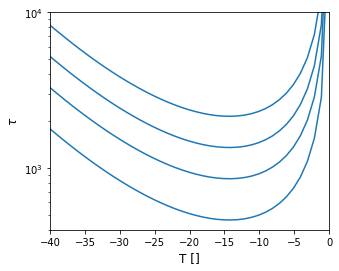

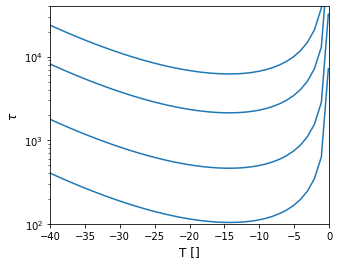

In [6]:
Ts = np.arange(-40.1,0.15,1)

params = dict(Lw='RY',rho_w='HS', D='HP', Ei='GG', Ew='GG')

fig, ax = plt.subplots(figsize=(5, 4))

tau = t_gl(100e3, 0.1e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")
tau = t_gl(100e3, 0.25e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")
tau = t_gl(100e3, 0.5e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")
tau = t_gl(100e3, 1e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")

ax.set_ylim([4e2, 1e4])
ax.set_yscale('log')
ax.set_xlim([-40, 0])

ax.set_ylabel('$\\tau$', fontsize=12)
ax.set_xlabel('Temperature [°C]')

fig.savefig('plots/PKK_fig1.png', transparent=True)


fig, ax = plt.subplots(figsize=(5, 4))

tau = t_gl(2e3, 0.1e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")
tau = t_gl(10e3, 0.1e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")
tau = t_gl(100e3, 0.1e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")
tau = t_gl(1000e3, 0.1e-3, 0, af.get_factors(273.15+Ts, 746e2, **params), Nw=100e6)
ax.plot(Ts, tau, "C0")

ax.set_ylim([1e2, 4e4])
ax.set_yscale('log')
ax.set_xlim([-40, 0])

ax.set_ylabel('$\\tau$', fontsize=12)
ax.set_xlabel('Temperature [°C]')

fig.savefig('plots/PKK_fig1b.png', transparent=True)

input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
case  [-0.06565956 -0.05987066 -0.05440583 -0.04925572 -0.044411   -0.03986234
 -0.03560039 -0.03161583 -0.02789933 -0.02444153 -0.02123312 -0.01826475
 -0.01552709 -0.0130108  -0.01070656 -0.00860502 -0.00669685 -0.00497271
 -0.00342327 -0.0020392  -0.00081115  0.0002702   0.00121419  0.00203016
  0.00272744  0.00331536  0.00380327  0.00420049  0.00451637  0.00476023
  0.00494141  0.00506925  0.00515308  0.00520224  0.00522606  0.00523388
  0.00523503  0.00523884  0.00525466  0.00529182  0.00535965  0.00546748
  0.00562466  0.00584052  0.00612439  0.0064856   0.0069335   0.00747742
  0.00812669  0.00889065  0.00977863  0.01079997  0.011964    0.01328006
  0.01475749  0.01640561  0.01823377  0.02025129  0.02246752  0.02489179
  0.02753343  0.03040178  0.03350618  0.03685595  0.04046044  0.04432897
  0.0484709   0.05289554]
[  50.0511005    51.29982744   52.61019122   53.98672251   55.43439311
   56.95867082  

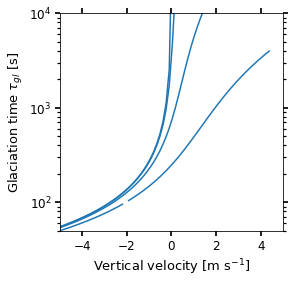

In [7]:
def t_gl_u(Ni, lwc, iwc, u, f, Nw=False,):
    """glaciation time depending for constant u (Pinsky 2014 Eq 23)
    
    """
    
    qw = lwc/f.rho_a
    qi = iwc/f.rho_a
    
    Nip23 = Ni**(2/3)
    Nwp23 = Nw**(2/3)
    
    gamma = (3*f.a0*u)/(2*(f.ksi-1)*f.upsilon_i*f.Bi*Nip23*f.a2)
    
    q0 = (qi + f.a1*qw/f.a2 \
          - (((3*qi**(2/3))/(2*(f.ksi-1)*f.upsilon_i*f.Bi*Nip23)) - \
             ((3*f.ksi*qw**(2/3))/(2*(f.ksi-1)*f.upsilon_w*f.Bw*Nwp23)))*(f.a0/f.a2*u))
    

    discr = (- (4*gamma**3*q0**3+27*q0**4)).astype(np.complex64)
    
    case = (4*gamma**3 + 27*q0)
#     print('discr ', discr)
    print('case ', 4*gamma**3 + 27*q0)
    
    #print('inside root', -3*discr, np.sqrt(-3*discr))   
        
#     a = 1
#     b = -1*gamma**2
#     c = -2*q0*gamma
#     d = -1*q0**2
#     roots = np.roots([a, b, c, d])
#     print('numpy ', roots)

    t72_108_8_12 = (72*gamma**3*q0 + 108*q0**2 + 8*gamma**6 + 12*np.sqrt(-3*discr))
    tt1 = t72_108_8_12**(1/3)/6 \
          + gamma**2/3 \
          + 2*gamma*(2*q0 + gamma**3/3)*t72_108_8_12**(-1/3)
    
    tt2 = -1/12*t72_108_8_12**(1/3) \
          + gamma**2/3 \
          - gamma*(2*q0 + gamma**3/3)*t72_108_8_12**(-1/3) \
          + (np.sqrt(3)/2)*np.array(1j)*(t72_108_8_12**(1/3)/6 - 2*gamma*(2*q0 + gamma**3/3)*t72_108_8_12**(-1/3))
    
#     print('tt1', tt1)
#     print('tt2', tt2)
    tt = np.zeros_like(tt1)
    tt[case > 0] = tt1[case > 0]
    tt[case < 0] = tt2[case < 0]
    # values too close to 0 cause numerical problems
    tt[np.abs(case)< 0.0005] = np.nan
    
#     print(tt)
    tt = np.real(tt)

#     print('tt ', tt)
    tau_gl = 3/(2*(f.ksi - 1)*f.upsilon_i*f.Bi*Nip23)*tt - \
            3/(2*(f.ksi - 1))*((qi**(2/3)/(f.upsilon_i*f.Bi*Nip23))-((f.ksi*qw**(2/3))/(f.upsilon_w*f.Bw*Nwp23)))
    
    return tau_gl


u = np.arange(-5,4.5,0.14)

params = dict(Lw='RY',rho_w='HS', D='HP', Ei='GG', Ew='GG')

fig, ax = plt.subplots(figsize=(4, 4))

tau = t_gl_u(500e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 746e2, **params), Nw=1000e6)
print(tau)
ax.plot(u, tau, "C0")

tau = t_gl_u(100e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 746e2, **params), Nw=1000e6)
ax.plot(u, tau, "C0")

tau = t_gl_u(10e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 746e2, **params), Nw=1000e6)
ax.plot(u, tau, "C0")

tau = t_gl_u(1e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 746e2, **params), Nw=1000e6)
ax.plot(u, tau, "C0")


ax.set_ylim([5e1, 1e4])
ax.set_yscale('log')
ax.set_xlim([-5, 5])

ax.set_ylabel('Glaciation time $\\tau_{gl}$ [s]', fontsize=13)
ax.set_xlabel('Vertical velocity [m s$^{-1}$]', fontsize=13)

ax.tick_params(axis='both', which='both', right=True, top=True)
ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
ax.tick_params(axis='both', which='minor', width=1.2, length=3)

fig.savefig('plots/PKK_fig8.png', transparent=True)